In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [40]:
df = pd.read_csv('salaries.csv')
df.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [41]:
from sklearn.preprocessing import LabelEncoder

enc1 = LabelEncoder()
company_enc = enc1.fit_transform(df['company'])
job_enc = enc1.fit_transform(df['job'])
degree_enc = enc1.fit_transform(df['degree'])
df['company_enc'] = company_enc
df['job_enc'] = job_enc
df['degree_enc'] = degree_enc
df.drop(['company', 'job', 'degree'], axis = 1)

,salary_more_then_100k,company_enc,job_enc,degree_enc
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [42]:
X = df[['company_enc', 'job_enc', 'degree_enc']]
y = df['salary_more_then_100k']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4444444444444444, 0.9, 'job_enc <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = no'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no'),
 Text(0.5555555555555556, 0.7, 'degree_enc <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = yes'),
 Text(0.3333333333333333, 0.5, 'company_enc <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = yes'),
 Text(0.2222222222222222, 0.3, 'company_enc <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(0.7777777777777778, 0.5, 'job_enc <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = no'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = no'),
 Text(0.8888888888888888, 

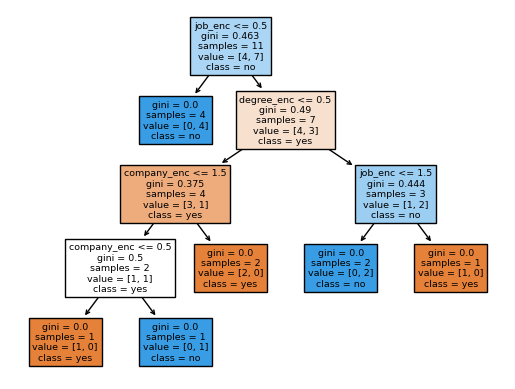

In [67]:
plot_tree(model, feature_names = ['company_enc', 'job_enc', 'degree_enc'], class_names = ['yes', 'no'], filled=True, impurity=True)


In [45]:
model.predict(X_test)

array([1, 0, 1, 1])

In [46]:
model.score(X_test, y_test)

0.75